# Notebook for comparison beween hi-class and class and 

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
tableau12 = [(0, 0, 0), (50, 0, 0), (0, 50, 0), (0, 0, 50),    
             (0, 50, 50), (50, 50, 0), (50, 0, 50), (50, 50, 50),    
             (100, 50, 50), (50, 100, 50), (50, 50, 100), (100, 100, 100)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau12)):    
    r, g, b = tableau12[i]    
    tableau12[i] = (r / 255., g / 255., b / 255.) 
    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
# plt.style.available
plt.rcParams.update(plt.rcParamsDefault)

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

# Adding files

In [8]:
#Class output in synchronous and Newtonian gauge for comparison with hi-class results.
#Class output  cs2=1.e-2, cs=1
# address="./Class_hiclass_results";
# Class_newt_cs_e0_z100=np.loadtxt(address+"class_cs_e0_newt/class_kess_cs_e0_newt_z1_tk.dat")
# Class_newt_cs_e0_z10=np.loadtxt("./Class_hiclass_results/class_cs_e0_newt/class_kess_cs_e0_newt_z2_tk.dat")
# Class_newt_cs_e0_z1=np.loadtxt("./Class_hiclass_results/class_cs_e0_newt/class_kess_cs_e0_newt_z3_tk.dat")
# Class_newt_cs_e0_z0=np.loadtxt("./Class_hiclass_results/class_cs_e0_newt/class_kess_cs_e0_newt_z4_tk.dat")
# Class_newt_cs_e0_zall=[Class_newt_cs_e0_z100,Class_newt_cs_e0_z10,Class_newt_cs_e0_z1,Class_newt_cs_e0_z0]

# #Class output cs2=1.e-2, cs=10^-1
# Class_newt_cs_e1_z100=np.loadtxt("./Class_hiclass_results/class_cs_e1_newt/class_kess_cs_e1_newt_z1_tk.dat")
# Class_newt_cs_e1_z10=np.loadtxt("./Class_hiclass_results/class_cs_e1_newt/class_kess_cs_e1_newt_z2_tk.dat")
# Class_newt_cs_e1_z1=np.loadtxt("./Class_hiclass_results/class_cs_e1_newt/class_kess_cs_e1_newt_z3_tk.dat")
# Class_newt_cs_e1_z0=np.loadtxt("./Class_hiclass_results/class_cs_e1_newt/class_kess_cs_e1_newt_z4_tk.dat")
# Class_newt_cs_e1_zall=[Class_newt_cs_e1_z100,Class_newt_cs_e1_z10,Class_newt_cs_e1_z1,Class_newt_cs_e1_z0]
# print(np.shape(Class_newt_cs_e1_zall))

# #Class output  cs2=1.e-6, cs=10^-3
# Class_newt_cs_e3_z100=np.loadtxt("./Class_hiclass_results/class_cs_e3_newt/class_kess_cs_e3_newt_z1_tk.dat")
# Class_newt_cs_e3_z10=np.loadtxt("./Class_hiclass_results/class_cs_e3_newt/class_kess_cs_e3_newt_z2_tk.dat")
# Class_newt_cs_e3_z1=np.loadtxt("./Class_hiclass_results/class_cs_e3_newt/class_kess_cs_e3_newt_z3_tk.dat")
# Class_newt_cs_e3_z0=np.loadtxt("./Class_hiclass_results/class_cs_e3_newt/class_kess_cs_e3_newt_z4_tk.dat")
# Class_newt_cs_e3_zall=[Class_newt_cs_e3_z100,Class_newt_cs_e3_z10,Class_newt_cs_e3_z1,Class_newt_cs_e3_z0]

# Class Background  cs2=1.e-6
Bg_class_cs_e3=np.loadtxt("./Class_hiclass_results/class_cs_e3_newt/class_kess_cs_e3_newt_background.dat")
Bg_class_cs_e0=np.loadtxt("./Class_hiclass_results/class_cs_e0_newt/class_kess_cs_e0_newt_background.dat")

# Hubble in class unit and Background checks!

('H0[1/Mpc]=100h/c: ', 0.00022593979933110373)


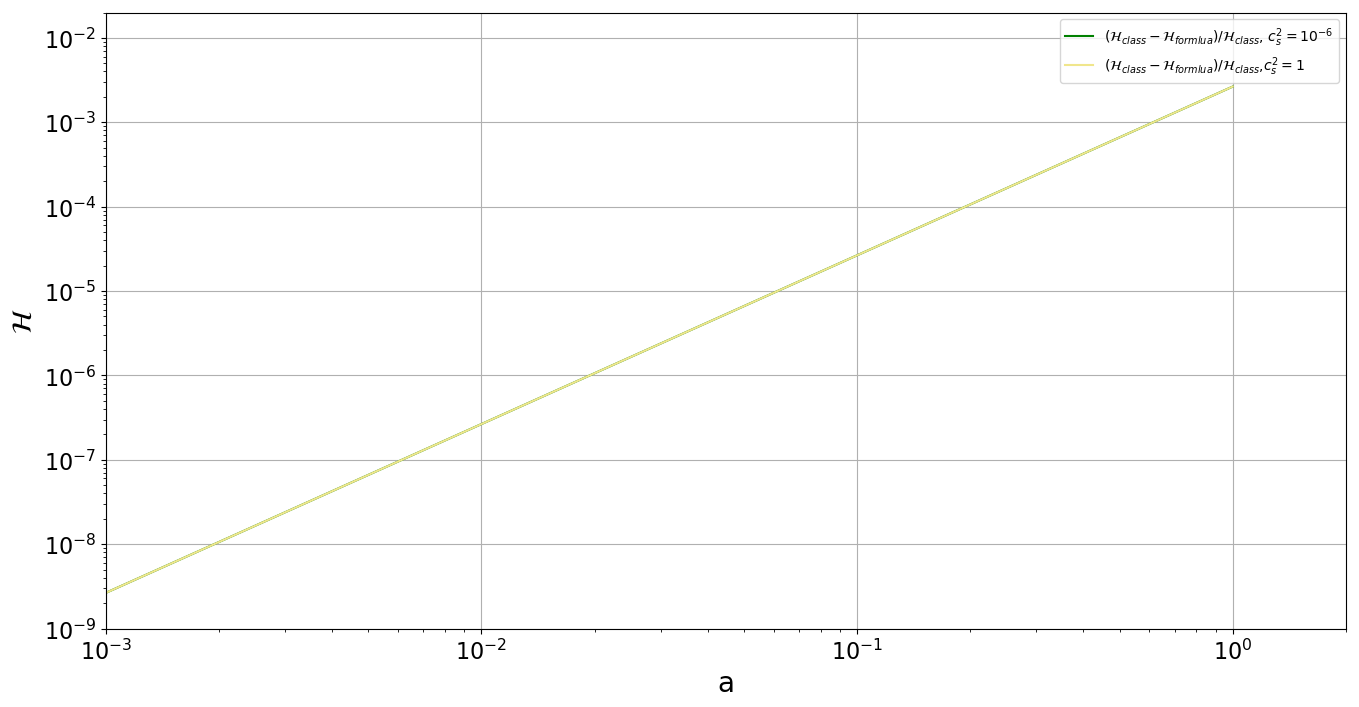

In [39]:
# H in unit Mpc!
h=0.67556;
c=2.99*1.e5;
H0=100*h/c;
print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Hclass_cs_e3=Bg_class_cs_e3[:,3]
aclass_cs_e3=1./(1+Bg_class_cs_e3[:,0])
Hclass_cs_e0=Bg_class_cs_e0[:,3]
aclass_cs_e0=1./(1+Bg_class_cs_e0[:,0])
a=np.arange(0.001,2,0.0001)

plt.figure(figsize=(16,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)
# plt.loglog(aclass_cs_e3,Hclass_cs_e3[:]*aclass_cs_e3,color="red",label="Class_cs3")
# plt.loglog(aclass_cs_e0,Hclass_cs_e0[:]*aclass_cs_e0,color="purple",label="Class_cs0")
# plt.loglog(aclass_cs_e3,Hubble_conf_Mpc(aclass_cs_e3),color="blue",label="Formlua")
plt.loglog(aclass_cs_e3,np.abs(Hclass_cs_e3[:]*aclass_cs_e3-Hubble_conf_Mpc(aclass_cs_e3))/Hclass_cs_e3[:]*aclass_cs_e3,color="green",label=r"$(\mathcal{H}_{class}-\mathcal{H}_{formlua})/\mathcal{H}_{class}$, $c_s^2=10^{-6}$")
plt.loglog(aclass_cs_e0,np.abs(Hclass_cs_e0[:]*aclass_cs_e0-Hubble_conf_Mpc(aclass_cs_e0))/Hclass_cs_e0[:]*aclass_cs_e0,color="khaki",label=r"$(\mathcal{H}_{class}-\mathcal{H}_{formlua})/\mathcal{H}_{class}$,$c_s^2=1$")
plt.grid()
# plt.loglog(a,H0*myHa,color="green",label="FormluaII")
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$\mathcal{H}$",fontsize=20)

# Hubble_conf_Mpc(a)
plt.legend(bbox_to_anchor=(0.5, 0.90, 0.4, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xlim(1e-3,2)
plt.ylim(1e-9,2e-2)
plt.savefig('Hubble_comp', format='jpg', dpi=300)

plt.legend()
plt.show()

# File making, cs=10^0, cs2=1

In [33]:
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
cs2=1.e0;
H_conf_z100_class=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_z10_class=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_z1_class=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_z0_class=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#List of hubble constants for different redshift.
H_conf_zall_list=[H_conf_z100_class,H_conf_z10_class,H_conf_z1_class,H_conf_z0_class];
z=[100,10,1,0]
# List of scale factor
a100=(1./(1.+100.));a10=(1./(1.+10.));a1=(1./(1.+1.));a0=(1./(1.+0.));


# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
for i in range (4):
    pi_Class_newt_cs_e0_zall=Class_newt_cs_e0_zall[i][:,12]/((Class_newt_cs_e0_zall[i][:,0]*h)**2);
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula:  pi'= \delta*(cs2/1+w) + \Psi +  H_conf (3cs2-1) \pi 
    pi_prime_Class_newt_cs_e0_zall=cs2*Class_newt_cs_e0_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e0_zall[i]*(3.*cs2-1.) + Class_newt_cs_e0_zall[i][:,8] ;

#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf
    Class_z_cs_e0=np.zeros((np.shape(Class_newt_cs_e0_zall[i])[0],8))

    Comments_columns="# Transfer functions T_i(k) for kessence field (normalized to initial curvature=1 at z= "+str(z[i])+" \
         # for k=1.05469e-05 to 239.653 h/Mpc, \
         #  number of wavenumbers equal to 199\
         # kessence model with w=-0.9 , cs^2= "+str(cs2)+"      \
         # d_i   stands for (delta rho_i/rho_i)(k,z) with above normalization \
         # d_tot stands for (delta rho_tot/rho_tot)(k,z) with rho_Lambda NOT included in rho_tot\
         # (note that this differs from the transfer function output from CAMB/CMBFAST, which gives the same\
         #  quantities divided by -k^2 with k in Mpc^-1; use format=camb to match CAMB)\
         # t_i   stands for theta_i(k,z) with above normalization \
         # t_tot stands for (sum_i [rho_i+p_i] theta_i)/(sum_i [rho_i+p_i]))(k,z)) \
         # k here is h/Mpc pi_conf (scalar field in conformal time) is in Mpc pi'_conf in dimensionless  \
         # Hubble is conformal hubble which is normalized to H0 \
         # d_kess means \pi_conf  in Newtonian gauge and in unit [Mpc] and t_kess means \pi' which is dimensionless \
\n   \n \
1:k (h/Mpc)              2:d_kess                    3:t_kess                    4:delta_fld                 5:theta_fld                  6:psi                   7:delta_cdm                 8:H_conf/H0                               "


    Class_z_cs_e0[:,0]=Class_newt_cs_e0_zall[i][:,0]    #k [h/Mpc] in class output
    Class_z_cs_e0[:,1]=pi_Class_newt_cs_e0_zall[:]    # pi_newt conformal
    Class_z_cs_e0[:,2]=pi_prime_Class_newt_cs_e0_zall[:]  #pi'_newt conformal
    Class_z_cs_e0[:,3]=Class_newt_cs_e0_zall[i][:,4]   #Delta_fld
    Class_z_cs_e0[:,4]=Class_newt_cs_e0_zall[i][:,12]  #Theta_fld
    Class_z_cs_e0[:,5]= Class_newt_cs_e0_zall[i][:,8]   #Phi
    Class_z_cs_e0[:,6]=Class_newt_cs_e0_zall[i][:,3]    #delta_CDM
    Class_z_cs_e0[:,7]=H_conf_zall_list[i]#Hubblez_conf
    np.savetxt('Class_kess_cs_e0_z'+str(z[i])+'_newt_Gev.dat',Class_z_cs_e0, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

# File making, cs=10^-1, cs2=0.01

In [34]:
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
cs2=0.01;
H_conf_z100_class=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_z10_class=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_z1_class=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_z0_class=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#List of hubble constants for different redshift.
H_conf_zall_list=[H_conf_z100_class,H_conf_z10_class,H_conf_z1_class,H_conf_z0_class];
z=[100,10,1,0]
# List of scale factor
a100=(1./(1.+100.));a10=(1./(1.+10.));a1=(1./(1.+1.));a0=(1./(1.+0.));


# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
for i in range (4):
    pi_Class_newt_cs_e1_zall=Class_newt_cs_e1_zall[i][:,12]/((Class_newt_cs_e1_zall[i][:,0]*h)**2);
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
    pi_prime_Class_newt_cs_e1_zall=cs2*Class_newt_cs_e1_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e1_zall[i]*(3.*cs2-1.) + Class_newt_cs_e1_zall[i][:,8] ;

#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf
    Class_z_cs_e1=np.zeros((np.shape(Class_newt_cs_e1_zall[i])[0],8))

    Comments_columns="# Transfer functions T_i(k) for kessence field (normalized to initial curvature=1 at z= "+str(z[i])+" \
         # for k=1.05469e-05 to 239.653 h/Mpc, \
         #  number of wavenumbers equal to 199\
         # kessence model with w=-0.9 , $cs^2$= "+str(cs2)+"     \
         # d_i   stands for (delta rho_i/rho_i)(k,z) with above normalization \
         # d_tot stands for (delta rho_tot/rho_tot)(k,z) with rho_Lambda NOT included in rho_tot\
         # (note that this differs from the transfer function output from CAMB/CMBFAST, which gives the same\
         #  quantities divided by -k^2 with k in Mpc^-1; use format=camb to match CAMB)\
         # t_i   stands for theta_i(k,z) with above normalization \
         # t_tot stands for (sum_i [rho_i+p_i] theta_i)/(sum_i [rho_i+p_i]))(k,z)) \
         # k here is h/Mpc pi_conf (scalar field in conformal time) is in Mpc pi'_conf in dimensionless  \
         # Hubble is conformal hubble which is normalized to H0 \
         # d_kess means \pi_conf  in Newtonian gauge and in unit [Mpc] and t_kess means \pi' which is dimensionless \
\n   \n \
1:k (h/Mpc)              2:d_kess                    3:t_kess                    4:delta_fld                 5:theta_fld                  6:psi                   7:delta_cdm                 8:H_conf/H0                               "


    Class_z_cs_e1[:,0]=Class_newt_cs_e1_zall[i][:,0]    #k [h/Mpc] in class output
    Class_z_cs_e1[:,1]=pi_Class_newt_cs_e1_zall[:]    # pi_newt conformal
    Class_z_cs_e1[:,2]=pi_prime_Class_newt_cs_e1_zall[:]  #pi'_newt conformal
    Class_z_cs_e1[:,3]=Class_newt_cs_e1_zall[i][:,4]   #Delta_fld
    Class_z_cs_e1[:,4]=Class_newt_cs_e1_zall[i][:,12]  #Theta_fld
    Class_z_cs_e1[:,5]= Class_newt_cs_e1_zall[i][:,8]   #Phi
    Class_z_cs_e1[:,6]=Class_newt_cs_e1_zall[i][:,3]    #delta_CDM
    Class_z_cs_e1[:,7]=H_conf_zall_list[i]#Hubblez_conf
    np.savetxt('Class_kess_cs_e1_z'+str(z[i])+'_newt_Gev.dat',Class_z_cs_e1, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

# File making, cs=10^-3, cs^2=0.000001

In [19]:
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
cs2=0.000001;
H_conf_z100_class=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_z10_class=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_z1_class=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_z0_class=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#List of hubble constants for different redshift.
H_conf_zall_list=[H_conf_z100_class,H_conf_z10_class,H_conf_z1_class,H_conf_z0_class];
z=[100,10,1,0]
# List of scale factor
a100=(1./(1.+100.));a10=(1./(1.+10.));a1=(1./(1.+1.));a0=(1./(1.+0.));
pi_Class_newt_cs_e3_zall=[]
pi_prime_Class_newt_cs_e3_zall=[]
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
for i in range (4):
    pi_Class_newt_cs_e3_zall.append(Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2));
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
    pi_prime_Class_newt_cs_e3_zall.append(cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8]) ;
#     print(np.sum(Class_newt_cs_e3_zall[0]-Class_newt_cs_e3_z100))
#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf
    Class_z_cs_e3=np.zeros((np.shape(Class_newt_cs_e3_zall[i])[0],8))

    Comments_columns="# Transfer functions T_i(k) for kessence field (normalized to initial curvature=1 at z= "+str(z[i])+" \
         # for k=1.05469e-05 to 239.653 h/Mpc, \
         #  number of wavenumbers equal to 199\
         # kessence model with w=-0.9 , $cs^2$= "+str(cs2)+"     \
         # d_i   stands for (delta rho_i/rho_i)(k,z) with above normalization \
         # d_tot stands for (delta rho_tot/rho_tot)(k,z) with rho_Lambda NOT included in rho_tot\
         # (note that this differs from the transfer function output from CAMB/CMBFAST, which gives the same\
         #  quantities divided by -k^2 with k in Mpc^-1; use format=camb to match CAMB)\
         # t_i   stands for theta_i(k,z) with above normalization \
         # t_tot stands for (sum_i [rho_i+p_i] theta_i)/(sum_i [rho_i+p_i]))(k,z)) \
         # k here is h/Mpc pi_conf (scalar field in conformal time) is in Mpc pi'_conf in dimensionless  \
         # Hubble is conformal hubble which is normalized to H0 \
         # d_kess means \pi_conf  in Newtonian gauge and in unit [Mpc] and t_kess means \pi' which is dimensionless \
\n   \n \
1:k (h/Mpc)              2:d_kess                    3:t_kess                    4:delta_fld                 5:theta_fld                  6:psi                   7:delta_cdm                 8:H_conf/H0                               "


    Class_z_cs_e3[:,0]=Class_newt_cs_e3_zall[i][:,0]    #k [h/Mpc] in class output
    Class_z_cs_e3[:,1]=pi_Class_newt_cs_e3_zall[i][:]    # pi_newt conformal
    Class_z_cs_e3[:,2]=pi_prime_Class_newt_cs_e3_zall[i][:]  #pi'_newt conformal
    Class_z_cs_e3[:,3]=Class_newt_cs_e3_zall[i][:,4]   #Delta_fld
    Class_z_cs_e3[:,4]=Class_newt_cs_e3_zall[i][:,12]  #Theta_fld
    Class_z_cs_e3[:,5]= Class_newt_cs_e3_zall[i][:,8]   #Phi
    Class_z_cs_e3[:,6]=Class_newt_cs_e3_zall[i][:,3]    #delta_CDM
    Class_z_cs_e3[:,7]=H_conf_zall_list[i]#Hubblez_conf
    print(i,z[i])
    np.savetxt('Class_kess_cs_e3_z'+str(z[i])+'_newt_Gev.dat',Class_z_cs_e3, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

(0, 100)
(1, 10)
(2, 1)
(3, 0)


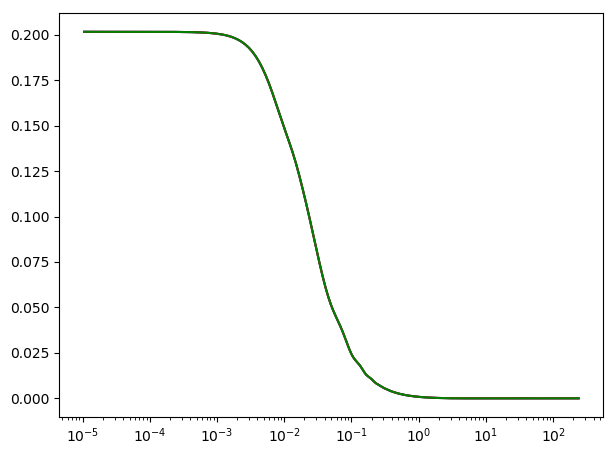

In [18]:
#     pi_Class_newt_cs_e3_zall=Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2);
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
#     pi_prime_Class_newt_cs_e3_zall=cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8] ;
# Class_newt_cs_e3_z100
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
cs2=0.000001;
pi_Class_newt_cs_e3_zall_N=Class_newt_cs_e3_zall[0][:,12]/((Class_newt_cs_e3_zall[0][:,0]*h)**2);
Class_newII=np.loadtxt("./Class_kess_cs_e3_z100_newt_Gev.dat")
H_conf_z100_class=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_z10_class=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_z1_class=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_z0_class=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################
pi_Class_Mona=Class_newt_cs_e3_z100[:,12]/((Class_newt_cs_e3_z100[:,0]*h)**2);
pi_prime_Mona=cs2*Class_newt_cs_e3_z100[:,4]/(1.+w) + H_conf_z100_class * pi_Class_Mona*(3.*cs2-1.) + Class_newt_cs_e3_z100[:,8] ;
#################
pi_Class_MonaI=Class_newt_cs_e3_zall[0][:,12]/((Class_newt_cs_e3_zall[0][:,0]*h)**2);
pi_prime_MonaII=cs2*Class_newt_cs_e3_zall[0][:,4]/(1.+w) + H_conf_zall_list[0] * pi_Class_MonaI*(3.*cs2-1.) + Class_newt_cs_e3_zall[0][:,8] ;

# plt.loglog(class_cs6[:,0],class_cs6[:,2],color="red",label=r"$\pi'$ in the file, $c_s=10^{-3}$, z="+str(z_list[0]))
plt.semilogx(Class_newt_cs_e3_z100[:,0],pi_prime_Mona[:],color="blue",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")
plt.semilogx(Class_newt_cs_e3_zall[0][:,0],pi_prime_MonaII[:],color="red",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")
plt.semilogx(Class_newII[:,0],Class_newII[:,2],color="green",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")

# plt.semilogx(Class_newII[:,0],pi_prime3l[:],color="green",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")

# plt.semilogx(class_cs6[:,0],(pi_prime_class_cs_e3_newt_zlist[:]-class_cs6[:,2]),color="green",label=r"$\pi'$ difference")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.25)
plt.show() 

In [22]:
np.sum(Class_newt_cs_e3_zall[0]-Class_newt_cs_e3_z100)
np.sum( H_conf_zall_list[0]-H_conf_z100_class)
np.sum( pi_Class_newt_cs_e3_zall-pi_Class_newt_cs_e3_zall_N)

0.0

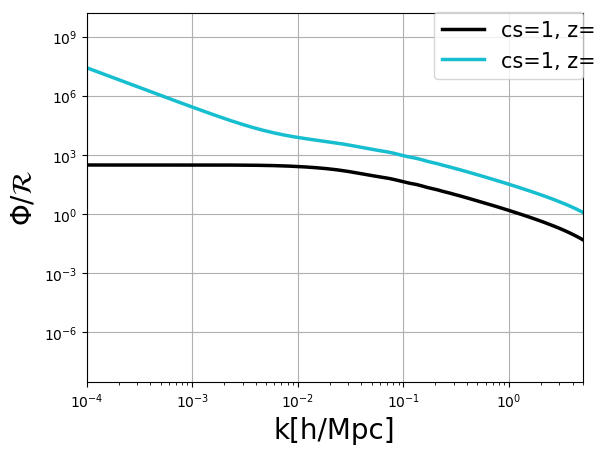

In [23]:
ClassI=np.loadtxt("./Class_kess_cs_e3_z100_newt_Gev.dat")
Class_org=np.loadtxt("./Class_Newt/class_cs_e3_newt/class_kess_cs_e3_newt_z1_tk.dat")
pi_I=ClassI[:,1]
pi_II=Class_org[:,4]/((Class_org[:,0]*h)**2);
# pi_prime_class_cs_e3_newt_zlist=(cs2*class_cs6[:,3]/(1.+w) + Hconf100*pi_class_cs_e3_newt_zlist*(3.*cs2-1.) + class_cs6[:,5])
plt.plot(ClassI[:,0],np.abs(pi_I[:]),color=tableau12[0],linestyle='solid',lw=2.5,label=r"cs=1, z="+str(z[1]))
plt.plot(Class_org[:,0],np.abs(pi_II[:]),color=tableau20[18],linestyle='solid',lw=2.5,label=r"cs=1, z="+str(z[1]))


plt.legend(bbox_to_anchor=(0.7, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\Phi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
plt.grid()

# plt.ylim(1.e-27,1.e-1)
# plt.savefig('phi_comparison.jpg', format='jpg', dpi=500)
plt.show()

# Tests

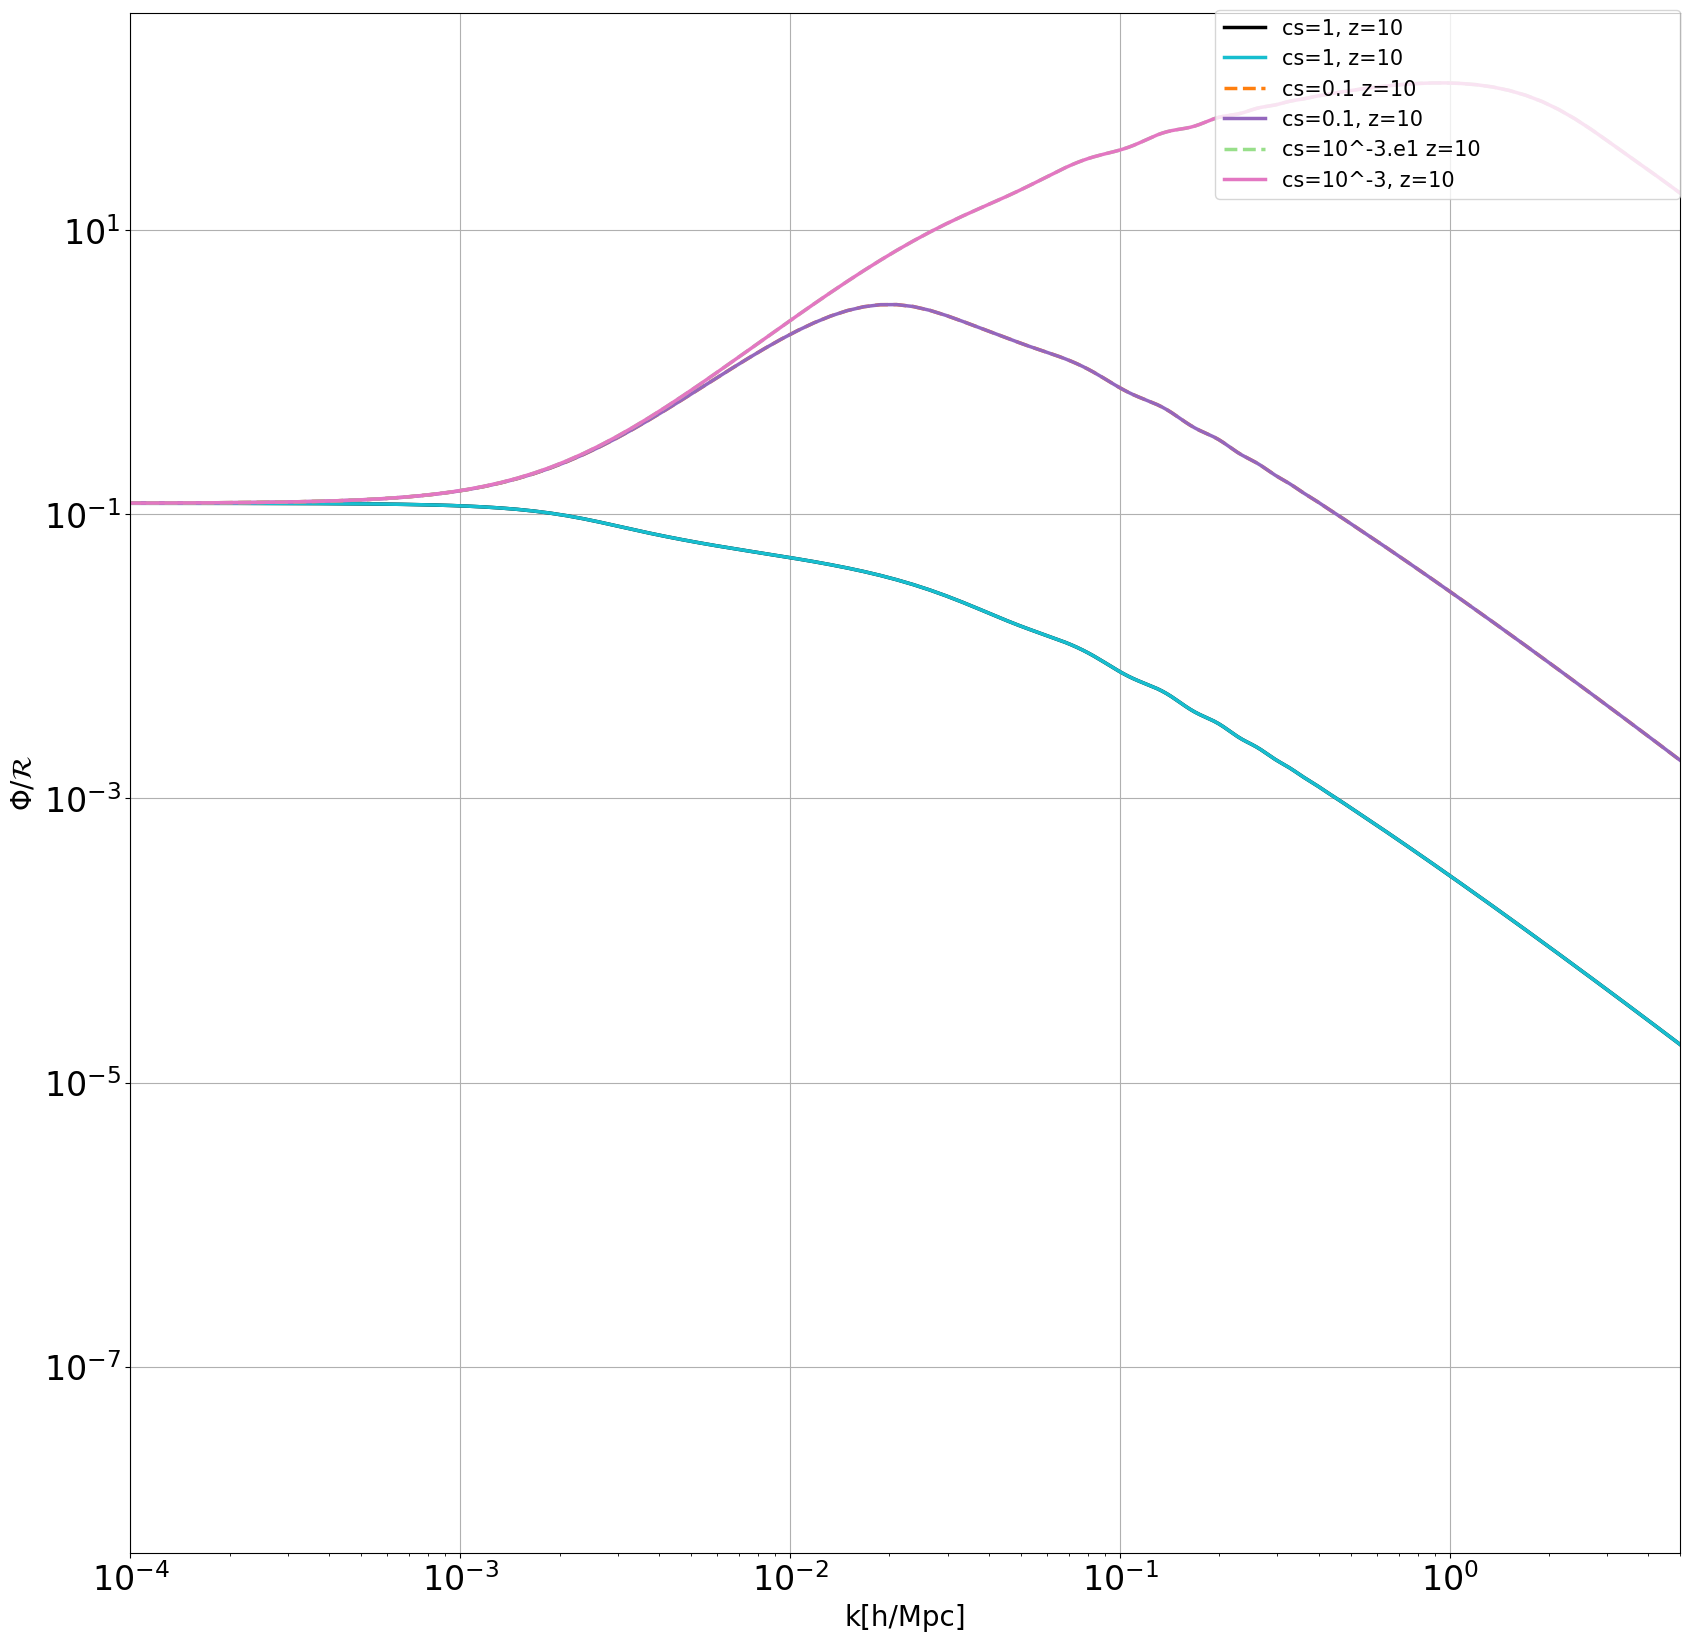

In [36]:
# Check that the files are correctly made: by delta_fld, just z=10!
Class_gev_cs_e0_z10=np.loadtxt("./Class_kess_cs_e0_z10_newt_Gev.dat")
Class_gev_cs_e1_z10=np.loadtxt("./Class_kess_cs_e1_z10_newt_Gev.dat")
Class_gev_cs_e3_z10=np.loadtxt("./Class_kess_cs_e3_z10_newt_Gev.dat")

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
z=[100,10,1,0]

#Plots cs=1
plt.plot(Class_newt_cs_e0_zall[1][:,0],np.abs(Class_newt_cs_e0_zall[1][:,4]),color=tableau12[0],linestyle='solid',lw=2.5,label=r"cs=1, z="+str(z[1]))
plt.plot(Class_gev_cs_e0_z10[:,0],np.abs(Class_gev_cs_e0_z10[:,3]),color=tableau20[18],linestyle='solid',lw=2.5,label=r"cs=1, z="+str(z[1]))
# # cs=0.1
plt.plot(Class_newt_cs_e1_zall[1][:,0],np.abs(Class_newt_cs_e1_zall[1][:,4]),color=tableau20[2],linestyle='dashed',lw=2.5,label=r"cs=0.1 z="+str(z[1]))
plt.plot(Class_gev_cs_e1_z10[:,0],np.abs(Class_gev_cs_e1_z10[:,3]),color=tableau20[8],linestyle='solid',lw=2.5,label=r"cs=0.1, z="+str(z[1]))
# # #cs=0.001
plt.plot(Class_newt_cs_e3_zall[1][:,0],np.abs(Class_newt_cs_e3_zall[1][:,4]),color=tableau20[5],linestyle='dashed',lw=2.5,label=r"cs=10^-3.e1 z="+str(z[1]))
plt.plot(Class_gev_cs_e3_z10[:,0],np.abs(Class_gev_cs_e3_z10[:,3]),color=tableau20[12],linestyle='solid',lw=2.5,label=r"cs=10^-3, z="+str(z[1]))

# Show the plots and save
plt.legend(bbox_to_anchor=(0.7, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\Phi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
plt.grid()

# plt.ylim(1.e-27,1.e-1)
# plt.savefig('phi_comparison.jpg', format='jpg', dpi=500)
plt.show()

In [ ]:
# Check that the files are correctly made: by delta_fld, just z=10!
Class_gev_cs_e0_z10=np.loadtxt("./Class_kess_cs_e0_z10_newt_Gev.dat")
Class_gev_cs_e1_z10=np.loadtxt("./Class_kess_cs_e1_z10_newt_Gev.dat")
Class_gev_cs_e3_z10=np.loadtxt("./Class_kess_cs_e3_z10_newt_Gev.dat")

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
z=[100,10,1,0]

#Plots cs=1
plt.plot(Class_newt_cs_e0_zall[1][:,0],np.abs(Class_newt_cs_e0_zall[1][:,4]),color=tableau12[0],linestyle='solid',lw=2.5,label=r"cs=1, z="+str(z[1]))
plt.plot(Class_gev_cs_e0_z10[:,0],np.abs(Class_gev_cs_e0_z10[:,3]),color=tableau20[18],linestyle='solid',lw=2.5,label=r"cs=1, z="+str(z[1]))
# # cs=0.1
plt.plot(Class_newt_cs_e1_zall[1][:,0],np.abs(Class_newt_cs_e1_zall[1][:,4]),color=tableau20[2],linestyle='dashed',lw=2.5,label=r"cs=0.1 z="+str(z[1]))
plt.plot(Class_gev_cs_e1_z10[:,0],np.abs(Class_gev_cs_e1_z10[:,3]),color=tableau20[8],linestyle='solid',lw=2.5,label=r"cs=0.1, z="+str(z[1]))
# # #cs=0.001
plt.plot(Class_newt_cs_e3_zall[1][:,0],np.abs(Class_newt_cs_e3_zall[1][:,4]),color=tableau20[5],linestyle='dashed',lw=2.5,label=r"cs=10^-3.e1 z="+str(z[1]))
plt.plot(Class_gev_cs_e3_z10[:,0],np.abs(Class_gev_cs_e3_z10[:,3]),color=tableau20[12],linestyle='solid',lw=2.5,label=r"cs=10^-3, z="+str(z[1]))

# Show the plots and save
plt.legend(bbox_to_anchor=(0.7, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\Phi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
plt.grid()

# plt.ylim(1.e-27,1.e-1)
# plt.savefig('phi_comparison.jpg', format='jpg', dpi=500)
plt.show()

In [ ]:
# Columns: k ,pi_synch, pi'_synch, \alpha, \alpha', Psi
#Check the sound speed is the same!
#Run class with much smaller sound speed and see...

# cs2=1.e-6;
# w=-0.9;
# h=0.67;
# As=2.215*10.e-9;
# ns=0.96;
# kp=0.05/h;
# Hubb=2.25e-4;



#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#Plots z=100
plt.plot(Class_newt_cs10_z100[:,0],-Class_newt_cs10_z100[:,4],color=tableau12[0],linestyle='solid',lw=2.5,label=r"1.e-5 z=100 ")
plt.plot(Class_newt_cs2_z100[:,0],-Class_newt_cs2_z100[:,4],color=tableau20[8],linestyle='solid',lw=2.5,label=r"1.e-1 z=100 ")
plt.plot(Class_newt_cs6_z100[:,0],-Class_newt_cs6_z100[:,4],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"1.e-3 z=100 ")


# Plots z=0
# plt.plot(Class_synch_cs6_z0_internal[:,0],Class_synch_cs6_z0_internal[:,1],color=tableau12[10],linestyle='solid',lw=2.5,label=r"$\Phi_{Synch}$ Class_Internally z=100 ")
# plt.plot(Class_newt_cs6_z0[:,0]*h,Class_newt_cs6_z0[:,8],color=tableau20[12],linestyle='solid',lw=2.5,label=r"$\Phi_{Newt}$ Class z=100 ")
# plt.plot(hiclass_cs6_0[:,0],hiclass_cs6_0[:,5],color=tableau20[9],linestyle='dashed',lw=2.5,label=r"$\Phi_{Newt}$ hiclass z=100 ")

# Show the plots and save
plt.legend(bbox_to_anchor=(0.7, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\Phi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
# plt.savefig('phi_comparison.jpg', format='jpg', dpi=500)
plt.show()

# Phi comparison class and hiclass

In [ ]:
# Columns: k ,pi_synch, pi'_synch, \alpha, \alpha', Psi
#Check the sound speed is the same!
#Run class with much smaller sound speed and see...

cs2=1.e-6;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
Hubb=2.25e-4;



#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#Plots z=100
plt.plot(Class_synch_cs6_z100_internal[:,0],Class_synch_cs6_z100_internal[:,1],color=tableau12[0],linestyle='solid',lw=2.5,label=r"$\Phi_{Synch}$ Class_Internally z=100 ")
plt.plot(Class_newt_cs6_z100[:,0]*h,Class_newt_cs6_z100[:,8],color=tableau20[8],linestyle='solid',lw=2.5,label=r"$\Phi_{Newt}$ Class z=100 ")
# plt.plot(hiclass_cs6_100[:,0],hiclass_cs6_100[:,5],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"$\Phi_{Newt}$ hiclass z=100 ")


# Plots z=0
plt.plot(Class_synch_cs6_z0_internal[:,0],Class_synch_cs6_z0_internal[:,1],color=tableau12[10],linestyle='solid',lw=2.5,label=r"$\Phi_{Synch}$ Class_Internally z=100 ")
plt.plot(Class_newt_cs6_z0[:,0]*h,Class_newt_cs6_z0[:,8],color=tableau20[12],linestyle='solid',lw=2.5,label=r"$\Phi_{Newt}$ Class z=100 ")
# plt.plot(hiclass_cs6_0[:,0],hiclass_cs6_0[:,5],color=tableau20[9],linestyle='dashed',lw=2.5,label=r"$\Phi_{Newt}$ hiclass z=100 ")

# Show the plots and save
plt.legend(bbox_to_anchor=(0.7, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\Phi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
# plt.savefig('phi_comparison.jpg', format='jpg', dpi=500)
plt.show()

# Class-hiclass and \pi in Newtonian gauge via formula

In [ ]:
# Columns hiclass: k ,pi_synch, pi'_synch, \alpha, \alpha', Psi
# Columns class_internally: k ,psi, alpha, \alpha',hubble
cs2=1.e-6;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
H_confz100class=0.00720435; # Unit=1/Mpc Hconf=a*H

# \pi_conf in Newtonian in class : -\theta/k^2 pi here is conformal pi!
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
pi_class_Newt_cs6_z100=Class_newt_cs6_z100[:,12]/((Class_newt_cs6_z100[:,0]*h)**2);
pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi

pi_prime_Newt_cs6_class_z100=cs2*Class_newt_cs6_z100[:,4]/(1.+w) + Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100*(3.*cs2-1.) + Class_newt_cs6_z100[:,8] ;

# Some checks!
# We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi 
pidot=pi_prime_Newt_cs6_class_z100 + Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100;

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)


#Plots z=100
# #Class 
plt.plot(Class_newt_cs6_z100[:,0]*h,(pidot[:]),color=tableau12[1],linestyle='solid',lw=2.5,label=r"$\dot{\pi}$ ")
plt.plot(Class_newt_cs6_z100[:,0]*h,pi_prime_Newt_cs6_class_z100[:],color=tableau20[12],linestyle='solid',lw=2.5,label=r"$\pi'$ ")
plt.plot(Class_newt_cs6_z100[:,0]*h,Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100,color=tableau20[3],linestyle='solid',lw=2.5,label=r"$ H\pi$")
plt.plot(Class_newt_cs6_z100[:,0]*h,Class_newt_cs6_z100[:,8],color=tableau20[0],linestyle='solid',lw=2.5,label=r"$ \Psi$")
plt.plot(Class_newt_cs6_z100[:,0]*h,pi_prime_Newt_cs6_class_z100[:]+Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100,color=tableau20[17],linestyle='solid',lw=2.5,label=r"$ \pi'+ \mathcal{H} \pi$")

# #Plots z=0
# Class
# plt.plot(Class_newt_cs6_z0[:,0]*h,pi_class_Newt_cs6_z0[:],color=tableau20[6],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=0, $c_s^2=10^{-6}$ ")
# plt.plot(Class_newt_cs2_z0[:,0]*h,pi_class_Newt_cs2_z0[:],color=tableau20[11],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ hi-class z=0, $c_s^2=10^{-2}$ ")
# plt.plot(Class_newt_cs10_z0[:,0]*h,pi_class_Newt_cs10_z0[:],color=tableau20[11],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=0, $c_s^2=10^{-10}$ ")

# hi-Class
# plt.plot(hiclass_cs6_0[:,0],hiclass_cs6_0[:,1],color=tableau20[3],linestyle='solid',lw=2.5,label=r"$\pi_{hiclass}$ hiClass z=0, $c_s^2=10^{-6}$ ")
# plt.plot(camb_cs6_z0[:,0],-camb_cs6_z0[:,1]*Hubb_eft_z0*30,color=tableau20[19],linestyle='solid',lw=2.5,label=r"$\pi_{Camb}$ Camb z=0, $c_s^2=10^{-6}$ ")

ax.text(0.3, 0.5, r"$\pi_{newton}=\frac{\theta}{(k h)^2}$   [Class]" "\n" "$c_s^2=10^{-6}, z=100$ ",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)
# Show the plots and save
plt.legend(bbox_to_anchor=(0.75, 0.90, 0.26, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\pi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
# plt.savefig('Class_1.jpg', format='jpg', dpi=500)
plt.show()

In [ ]:
Hubblez_conf100

In [ ]:
# Columns hiclass: k ,pi_synch, pi'_synch, \alpha, \alpha', Psi
# Columns class_internally: k ,psi, alpha, \alpha',hubble
cs2=1.e-6;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
Hubblez_conf100=Hubble_Mpc(1./(100.+1.))*1./(1.+100.); # Unit=1/Mpc Hconf=a*H

# \pi_conf in Newtonian in class : -\theta/k^2 pi here is conformal pi!
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
pi_class_Newt_cs6_z100=Class_newt_cs6_z100[:,12]/((Class_newt_cs6_z100[:,0]*h)**2);
pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi

pi_prime_Newt_cs6_class_z100=cs2*Class_newt_cs6_z100[:,4]/(1.+w) + Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100*(3.*cs2-1.) + Class_newt_cs6_z100[:,8] ;

# Some checks!
# We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi 
pidot=pi_prime_Newt_cs6_class_z100 + Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100;

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)


#Plots z=100
# #Class 
plt.plot(Class_newt_cs6_z100[:,0]*h,np.abs(pidot[:]-Class_newt_cs6_z100[:,8]),color=tableau12[1],linestyle='solid',lw=2.5,label=r"${{\pi'}+\mathcal{H} \pi-\Psi}$ ")
# plt.plot(Class_newt_cs6_z100[:,0]*h,np.abs(pi_prime_Newt_cs6_class_z100[:]+ Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100-Class_newt_cs6_z100[:,8])/Class_newt_cs6_z100[:,8],color=tableau12[6],linestyle='solid',lw=2.5,label=r"$\frac{{\pi'}+\mathcal{H} \pi-\Psi}{\Psi}$ ")
# 
# plt.plot(Class_newt_cs6_z100[:,0]*h,pi_prime_Newt_cs6_class_z100[:],color=tableau20[12],linestyle='solid',lw=2.5,label=r"$\pi'$ ")
# plt.plot(Class_newt_cs6_z100[:,0]*h,Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100,color=tableau20[3],linestyle='solid',lw=2.5,label=r"$ H\pi$")
# plt.plot(Class_newt_cs6_z100[:,0]*h,,color=tableau20[0],linestyle='solid',lw=2.5,label=r"$ \Psi$")
# plt.plot(Class_newt_cs6_z100[:,0]*h,pi_prime_Newt_cs6_class_z100[:]+Hubble_conf_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100,color=tableau20[17],linestyle='solid',lw=2.5,label=r"$ \pi'+ \mathcal{H} \pi$")


# #Plots z=0
# Class
# plt.plot(Class_newt_cs6_z0[:,0]*h,pi_class_Newt_cs6_z0[:],color=tableau20[6],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=0, $c_s^2=10^{-6}$ ")
# plt.plot(Class_newt_cs2_z0[:,0]*h,pi_class_Newt_cs2_z0[:],color=tableau20[11],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ hi-class z=0, $c_s^2=10^{-2}$ ")
# plt.plot(Class_newt_cs10_z0[:,0]*h,pi_class_Newt_cs10_z0[:],color=tableau20[11],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=0, $c_s^2=10^{-10}$ ")

# hi-Class
# plt.plot(hiclass_cs6_0[:,0],hiclass_cs6_0[:,1],color=tableau20[3],linestyle='solid',lw=2.5,label=r"$\pi_{hiclass}$ hiClass z=0, $c_s^2=10^{-6}$ ")
# plt.plot(camb_cs6_z0[:,0],-camb_cs6_z0[:,1]*Hubb_eft_z0*30,color=tableau20[19],linestyle='solid',lw=2.5,label=r"$\pi_{Camb}$ Camb z=0, $c_s^2=10^{-6}$ ")

ax.text(0.5, 0.2, r"$\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$" "\n" r"$\pi_{newton}=\frac{\theta}{(k h)^2}$   [Class]"  "\n" "$c_s^2=10^{-6}, z=100$ ",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)
# Show the plots and save
plt.legend(bbox_to_anchor=(0.75, 0.90, 0.26, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"${\pi' + \mathcal{H} \pi-\Psi}$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
plt.savefig('Class_2.jpg', format='jpg', dpi=500)
plt.show()

# Alpha comparison hi-class (unternally) class (internally)

In [ ]:
# Columns hiclass: k ,pi_synch, pi'_synch, \alpha, \alpha', Psi
# Columns class_internally: k ,psi, alpha, \alpha',hubble
cs2=1.e-6;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
Hubblez100=Hubble_Mpc(1./(100.+1.)); # Unit=1/Mpc

#Background quantities
coeff=(cs2)/(1+w);

# \pi in Newtonian in class : -\theta/k^2
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
pi_class_Newt_cs6_z100=Class_newt_cs6_z100[:,12]/((Class_newt_cs6_z100[:,0]*h)**2);
pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi' in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H cs2 \pi
# pi_prime_Newtonian_class_z100=coeff*Class_newt_z100[:,4] + 3.*cs2*Hubbz100*a100*pi_class_Newt_cs0_z100 + Class_newt_z100[:,7] ;
pi_prime_Newt_cs6_class_z100=coeff*Class_newt_z100[:,4] + 3.*cs2*Hubble_Mpc(1./(100.+1.))*pi_class_Newt_cs6_z100 + Class_newt_z100[:,8] ;
pi_prime_Newt_cs6_class_z0=coeff*Class_newt_z0[:,4] + 3.*cs2*Hubble_Mpc(1./(0.+1.))*pi_class_Newt_cs0_z0 + Class_newt_z0[:,7] ;

# \pi in Newtonian in class cs2=1e-10 : -\theta/k^2
# pi_class_Newt_cs10_z100=Class_newt_cs10_z100[:,12]/((Class_newt_cs10_z100[:,0]*h)**2);
# pi_class_Newt_cs10_z0=Class_newt_cs10_z0[:,12]/((Class_newt_cs10_z0[:,0]*h)**2);

# # \pi in Newtonian in class cs2=1e-2 : -\theta/k^2
# pi_class_Newt_cs2_z100=Class_newt_cs2_z100[:,12]/((Class_newt_cs2_z100[:,0]*h)**2);
# pi_class_Newt_cs2_z0=Class_newt_cs2_z0[:,12]/((Class_newt_cs2_z0[:,0]*h)**2);

# \pi in Newtonian gauge in hi-class pi_Newt= pi_Synch +\alpha
# pi_hiclass_Newt_cs6_z100=hiclass_cs6_100[:,1]+hiclass_cs6_100[:,3];
# pi_hiclass_Newt_cs6_z0=hiclass_cs6_0[:,1]+hiclass_cs6_0[:,3];

# # \pi in Newtonian gauge in hi-class cs2=1e-10 pi_Newt= pi_Synch +\alpha
# pi_hiclass_cs10_Newt_z100=hiclass_cs10_All_100[:,1]+hiclass_cs10_All_100[:,3];
# pi_hiclass_cs10_Newt_z0=hiclass_cs10_All_0[:,1]+hiclass_cs10_All_0[:,3];

# # \pi in Newtonian gauge in hi-class cs2=1e-2 pi_Newt= pi_Synch +\alpha
# pi_hiclass_cs2_Newt_z100=hiclass_cs2_All_100[:,1]+hiclass_cs2_All_100[:,3];
# pi_hiclass_cs2_Newt_z0=hiclass_cs2_All_0[:,1]+hiclass_cs2_All_0[:,3];


#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)


#Plots z=100
# #Class 
# plt.plot(Class_newt_cs6_z0[:,0]*h,pi_class_Newt_cs6_z100[:],color=tableau20[3],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=100, $c_s^2=10^{-6}$ ")
# plt.plot(Class_newt_cs2_z0[:,0]*h,pi_class_Newt_cs2_z100[:],color=tableau20[3],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=100, $c_s^2=10^{-2}$ ")


# #Plots z=0
# Class
# plt.plot(Class_newt_cs6_z0[:,0]*h,pi_class_Newt_cs6_z0[:],color=tableau20[6],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=0, $c_s^2=10^{-6}$ ")
# plt.plot(Class_newt_cs2_z0[:,0]*h,pi_class_Newt_cs2_z0[:],color=tableau20[11],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ hi-class z=0, $c_s^2=10^{-2}$ ")
# plt.plot(Class_newt_cs10_z0[:,0]*h,pi_class_Newt_cs10_z0[:],color=tableau20[11],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=0, $c_s^2=10^{-10}$ ")

# hi-Class
# plt.plot(hiclass_cs6_0[:,0],hiclass_cs6_0[:,1],color=tableau20[3],linestyle='solid',lw=2.5,label=r"$\pi_{hiclass}$ hiClass z=0, $c_s^2=10^{-6}$ ")
# plt.plot(camb_cs6_z0[:,0],-camb_cs6_z0[:,1]*Hubb_eft_z0*30,color=tableau20[19],linestyle='solid',lw=2.5,label=r"$\pi_{Camb}$ Camb z=0, $c_s^2=10^{-6}$ ")

ax.text(0.3, 0.5, r"$\pi_{newton}=\frac{\theta}{(k h)^2}$   [Class]" "\n" r"$\pi_{newton}=\pi_{synch}+\alpha $   [hiclass]",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)
# Show the plots and save
plt.legend(bbox_to_anchor=(0.00, 0.90, 0.26, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\pi/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
# plt.savefig('camb_hiclass.jpg', format='jpg', dpi=500)
plt.show()

# Class-hiclass \pi in Synchronous gauge via formula

# EFT CAMB and hiclass comparison in \pi \pi' transfer function

# Class-hiclass \pi' in Newtonian gauge via formula

In [ ]:
# Confused about the fomula! It seems the formula in Domeco's paper is different with mine! what is cs^2 in my calculation?
#Todo: \delta\P/\delta \rho= cs2 + ... do it in the formula. 

# Columns: k ,pi_synch, pi'_synch, \alpha, \alpha', Psi
cs2=1.e-6;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;

#Background quantities
Hubbz100=1.452411e-01;
a100=1./(1.+100.);
Hubbz10=4.633370e-03;
Hubz3=1.064036e-03;
Hubbz0=2.25e-4;
a0=1.;

coeff=(cs2)/(1+w);
# \pi in Newtonian in class : -\theta/k^2
pi_class_Newt_cs0_z100=Class_newt_z100[:,12]/((Class_newt_z100[:,0]*h)**2);
pi_class_Newt_cs0_z10=Class_newt_z10[:,12]/((Class_newt_z10[:,0]*h)**2);
pi_class_Newt_cs0_z3=Class_newt_z3[:,12]/((Class_newt_z3[:,0]*h)**2);
pi_class_Newt_cs0_z0=Class_newt_z0[:,12]/((Class_newt_z0[:,0]*h)**2);
# \pi in Newtonian in class cs2=1e-10 : -\theta/k^2
pi_class_Newt_cs10_z100=Class_newt_cs10_z100[:,12]/((Class_newt_cs10_z100[:,0]*h)**2);
pi_class_Newt_cs10_z10=Class_newt_cs10_z10[:,12]/((Class_newt_cs10_z10[:,0]*h)**2);
pi_class_Newt_cs10_z3=Class_newt_cs10_z3[:,12]/((Class_newt_cs10_z3[:,0]*h)**2);
pi_class_Newt_cs10_z0=Class_newt_cs10_z0[:,12]/((Class_newt_cs10_z0[:,0]*h)**2);

# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi' in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H cs2 \pi
# pi_prime_Newtonian_class_z100=coeff*Class_newt_z100[:,4] + 3.*cs2*Hubbz100*a100*pi_class_Newt_cs0_z100 + Class_newt_z100[:,7] ;
pi_prime_Newtonian_class_z100=coeff*Class_newt_z100[:,4] + 3.*cs2*Hubbz100*a100*pi_class_Newt_cs0_z100 + Class_newt_z100[:,8] ;
pi_prime_Newtonian_class_z0=coeff*Class_newt_z0[:,4] + 3.*cs2*Hubbz0*a0*pi_class_Newt_cs0_z0 + Class_newt_z0[:,7] ;

pi_prime_cs10_Newtonian_class_z100=coeff*Class_newt_cs10_z100[:,4] + 3.*cs2*Hubbz100*a100*pi_class_Newt_cs0_z100 + Class_newt_cs10_z100[:,8] ;
pi_prime_cs10_Newtonian_class_z0=coeff*Class_newt_cs10_z0[:,4] + 3.*cs2*Hubbz0*a0*pi_class_Newt_cs0_z0 + Class_newt_cs10_z0[:,7] ;

#pi' in hiclass according to the formula: pi'_synch + alpha'
pi_prime_Newtonian_hiclass_z100=hiclass_All_100[:,2]+hiclass_All_100[:,4];
pi_prime_Newtonian_hiclass_z0=hiclass_All_0[:,2]+hiclass_All_0[:,4];
pi_prime_cs10_Newtonian_hiclass_z100=hiclass_cs10_All_100[:,2]+hiclass_cs10_All_100[:,4];
pi_prime_cs10_Newtonian_hiclass_z0=hiclass_cs10_All_0[:,2]+hiclass_cs10_All_0[:,4];
#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#Plots z=100
plt.plot(Class_newt_z100[:,0]*h,pi_prime_Newtonian_class_z100[:],color=tableau12[0],linestyle='solid',lw=2.5,label=r"$\pi'_{Newt}$ class z=100 ")
plt.plot(hiclass_All_100[:,0],pi_prime_Newtonian_hiclass_z100[:],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"$\pi'_{Newt}$ hiclass z=100 ")
plt.plot(Class_newt_z100[:,0]*h,pi_prime_cs10_Newtonian_class_z100[:],color=tableau12[0],linestyle='solid',lw=2.5,label=r"$\pi'_{Newt}$ class z=100 ")
plt.plot(hiclass_cs10_All_100[:,0],pi_prime_cs10_Newtonian_hiclass_z0[:],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"$\pi'_{Newt}$ hiclass z=100 ")

# #Plots z=10
# plt.plot(Class_newt_z10[:,0]*h,pi_prime_Newtonian_class_z10[:],color=tableau12[2],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=10 ")
# plt.plot(hiclass_All_10[:,0],pi_hiclass_Newt_cs0_z10[:],color=tableau20[7],linestyle='dashed',lw=2.5,label=r"$\pi_{Newt}$ hi-class z=10 ")

# #Plots z=3
# plt.plot(Class_newt_z3[:,0]*h,pi_class_Newt_cs0_z3[:],color=tableau12[4],linestyle='solid',lw=2.5,label=r"$\pi_{Newt}$ class z=3 ")
# plt.plot(hiclass_All_3[:,0],pi_hiclass_Newt_cs0_z3[:],color=tableau20[9],linestyle='dashed',lw=2.5,label=r"$\pi_{Newt}$ hi-class z=3 ")

# #Plots z=0
plt.plot(Class_newt_z0[:,0]*h,pi_prime_Newtonian_class_z0[:],color=tableau12[6],linestyle='solid',lw=2.5,label=r"$\pi'_{Newt}$ class z=0 ")
plt.plot(hiclass_All_0[:,0],pi_hiclass_Newt_cs0_z0[:],color=tableau20[11],linestyle='dashed',lw=2.5,label=r"$\pi'_{Newt}$ hi-class z=0 ")

# Show the plots and save
plt.legend(bbox_to_anchor=(0.8, 0.90, 0.2, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$\pi'/\mathcal{R}$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
# plt.savefig('pi_kcomparison.jpg', format='eps', dpi=1000)
plt.show()

# Class-hiclass \pi'  in Synchronous gauge via formula

In [ ]:
# \delta_m class vs \delta_kessence and compare with Gevolution.